# Data Visualizations - Test Your Knowledge Key

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load the data
smoke_data <- read.csv("Module3_1/Module3_1_DataforVisualizations.csv")

head(smoke_data)

,Chemical.Category,Chemical,CASRN,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69,ng_per_uL


Like we did in the module, we'll start by changing the dataframe into a long format and creating a new column for scaled chemical concentrations.

In [3]:
scaled_longer_smoke_data = pivot_longer(smoke_data, cols = 4:13, names_to = "Biomass_Burn_Condition", 
                                 values_to = "Chemical_Concentration") %>%
    # scaling within each chemical
    group_by(Chemical) %>%
    mutate(Scaled_Chemical_Concentration = scale(Chemical_Concentration)) %>%
    ungroup()

head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Flaming,0.06,-0.3347765


The underscore between the biomass and the burn condition is retained. For example, in the dataframe we have the class `Red_Oak_Smoldering`. In the code below, that will be changed to `Red Oak_Smoldering`. 

This allows us to the underscores as a separator to split the `Biomass_Burn_Condition` column into `Biomass` and `Burn_Condition` using the `separate` function later on.

In [4]:
scaled_longer_smoke_data = scaled_longer_smoke_data %>%
    mutate(Biomass_Burn_Condition = ifelse(Biomass_Burn_Condition == "Red_Oak_Smoldering", "Red Oak_Smoldering",
                ifelse(Biomass_Burn_Condition == "Red_Oak_Flaming", "Red Oak_Flaming",
                    ifelse(Biomass_Burn_Condition == "Pine_Needles_Smoldering", "Pine Needles_Smoldering",
                        ifelse(Biomass_Burn_Condition == "Pine_Needles_Flaming", "Pine Needles_Flaming",
                            Biomass_Burn_Condition)))))


head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Flaming,0.06,-0.3347765


Splitting `Biomass_Burn_Condition` into `Biomass` and `Burn_Condition`.

In [5]:
scaled_longer_smoke_data = scaled_longer_smoke_data %>%
    separate(Biomass_Burn_Condition, c("Biomass", "Burn_Condition"), sep = "_")

head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass,Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus,Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus,Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat,Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat,Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine,Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine,Flaming,0.06,-0.3347765


## Heat Map

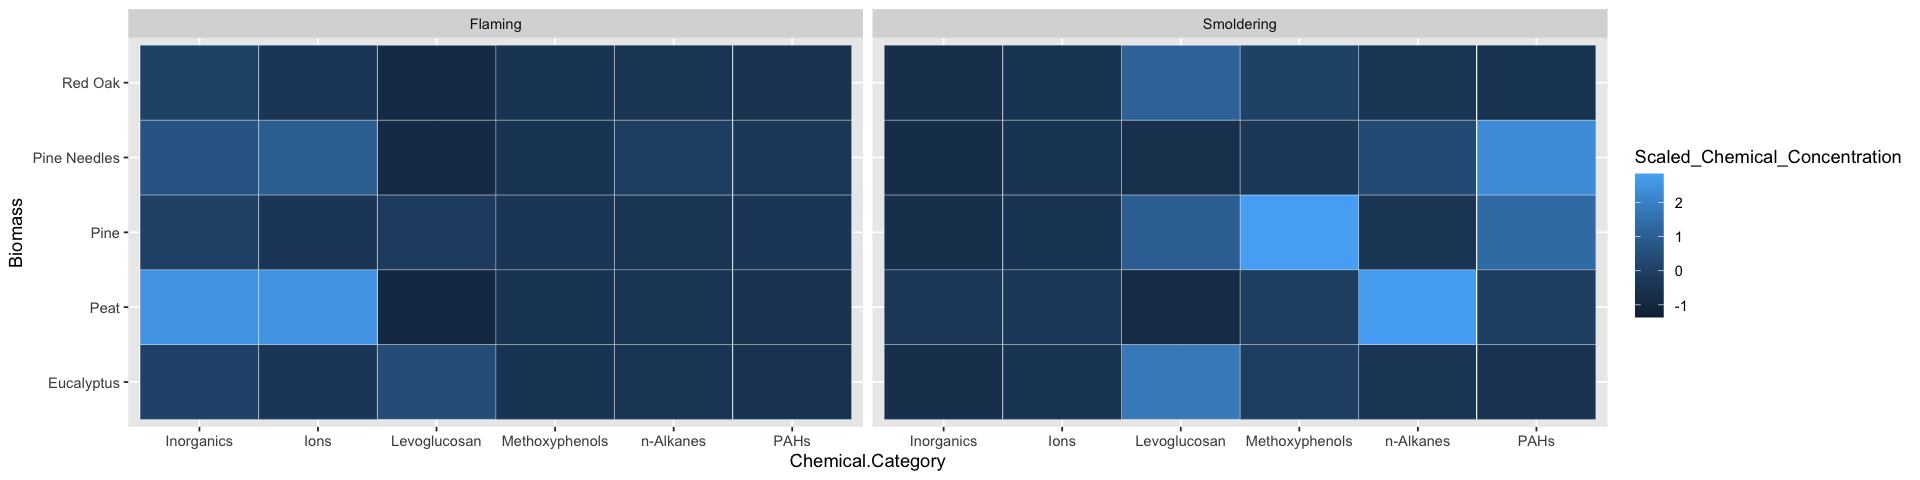

In [6]:
options(repr.plot.width = 16, repr.plot.height = 4)
Module3_1_TYK_figure = ggplot(data = scaled_longer_smoke_data, aes(x = Chemical.Category, y = Biomass,
                                           fill = Scaled_Chemical_Concentration)) + 
  geom_tile(color = 'white') + # adds white space between the tile

  facet_wrap(~Burn_Condition)  

Module3_1_TYK_figure

In [9]:
Output = "/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1006. Data Organization & File Management/P1006.2. Modules/P1006.2.6. Data Visualizations/Module3_3"

# exporting figure
ggsave(Module3_1_TYK_figure, 
       filename = 'Module3_1_TYK_figure.png',
       path = Output,
       width = 16, height = 4)